Here, the profiles are sorted by their appearence.  As the attenuation appear to be little, the impact Nw-Dm may be investigated without attenuation correction, at least for some classes.

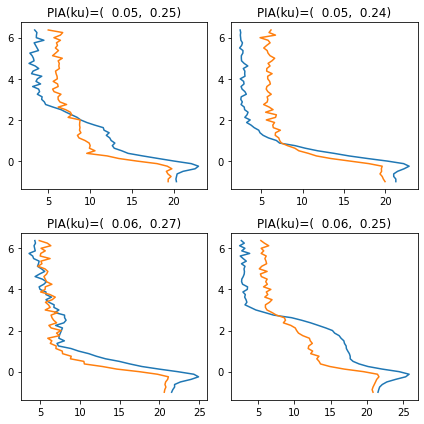

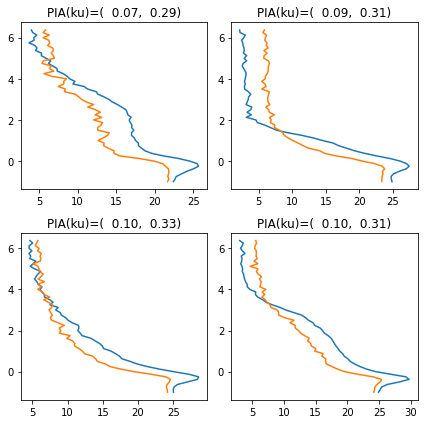

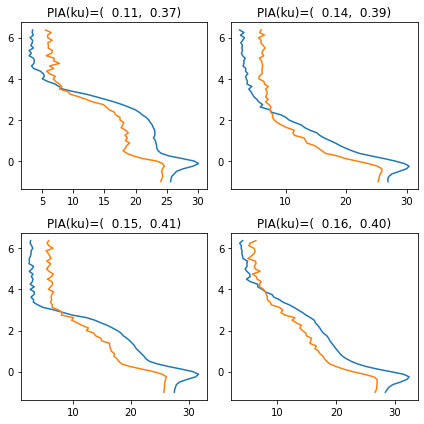

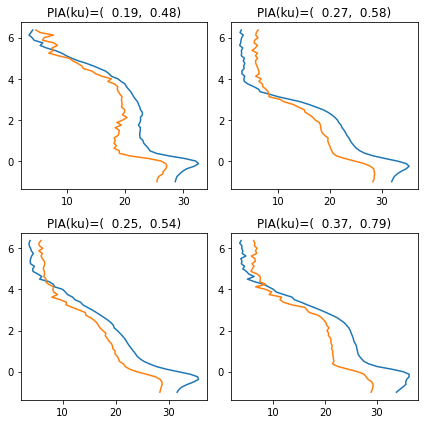

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
import pickle
import numpy as np

[zKuL_SP,zKaL_SP,nodesL_SP,retr_SP]=pickle.load(open("../SP_Retrievals.pklz","rb"))
# SP is actually Southern Oceans
#zKuL, zKaL are lists of zKu and zKa observed profiles
# nodes=list containing the nodes defining the storm structure, i.e. 
# top, zero degree, clutter free, brightband top, bright band peak and surface bins
# retr_ several retrieved variables, i.e. cmb_sfc_rate1d,dpr+sfc_rate,
# precip Type(1=stratiform), surface Dm(mm), surface log10(dNw)=log10(Nw/0.08(cm^-4))
# clutter free bin, cmb piaKu, cmb piaKu, dSRT PIA(ku), dpr eps(bin clutter free), 
# dsrt reliability flag

[zKuL_T,zKaL_T,nodesL_T,retr_T]=pickle.load(open("../Tropics_Retrievals.pklz","rb"))

z1L=[]
z2L=[]
piaLs=[]

# top, zero degree, clutter free, brightband top, bright band peak and surface bins
# rrate_cmb,dprsfcRate,pType,dm1d,dn1d,dmDPR,piaku,piaka,piaSRT,epsDPR,reliabFlag,binBB
#         0,    1     ,  2  , 3  , 4  ,  5,    6,    7,    8,    9,       10,      11    
for zku1,zka1,nodes,retr1 in zip(zKuL_SP,zKaL_SP,nodesL_SP,retr_SP):
    zbb=zku1[nodes[-2]]-zka1[nodes[-2]]
    if zku1[nodes[-2]]>10 and zka1[nodes[-2]]>10:
        if nodes[2]-nodes[1]>8:
            nodes2=nodes[1]+8
            z1L.append(zku1[nodes2-60:nodes2])
            z2L.append(zka1[nodes2-60:nodes2])
            piaLs.append([retr1[6],retr1[7], retr1[8]])

from sklearn.cluster import KMeans
z1L=np.array(z1L)
z2L=np.array(z2L)
piaLs=np.array(piaLs)
z1L[z1L<0]=0
z2L[z2L<0]=0
kmeans = KMeans(n_clusters=16, random_state=0).fit(z1L[:,:])
zS=[]
for i in range(16):
    a=np.nonzero(kmeans.labels_==i)
    zS.append(np.mean((10.0**(0.1*z1L[a[0],-8:]*0.71)).sum(axis=1)))

ind=np.argsort(zS)
for i in range(16):
    if i%4==0:
        plt.figure(figsize=(6,6))
    plt.subplot(2,2,i%4+1)
    a=np.nonzero(kmeans.labels_==ind[i])
    plt.plot(z1L[a[0],:].mean(axis=0)[::-1],np.arange(60)*0.125-1.0)
    plt.plot(z2L[a[0],:].mean(axis=0)[::-1],np.arange(60)*0.125-1.0)
    plt.title("PIA(ku)=(%6.2f,%6.2f)"%(piaLs[a[0],0].mean(axis=0),piaLs[a[0],-1].mean(axis=0)))
    plt.tight_layout()


In [1]:
import combAlg as cmb
cmb.mainfortpy()
cmb.initp2()
